**PERCOLATION ON BOOLEAN NETWORKS**

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. the probability that two vertices are connected by an edge - changes. As the
connectivity increases the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value, called percolation threshold. The scope of the present project is to study
numerically this phenomenon in Boolean networks.

In [4]:
import numpy as np #for linear algebra
import matplotlib.pyplot as plt
import math
from collections import deque  # Importa la classe deque da collections


**Poisson Process on a Plane**

 To define Boolean model networks we need to introduce first Poisson processes on the plane. A
random set of points $X$ $⊂$ $R^2$
 is said to be a Poisson process of density $\lambda$ > 0 on the plane if it
satisfies the following conditions:

* Let $X(D)$ denote the random number of points of X inside a domain D. For mutually disjoint sets $D_1$, $D_2$, ..., $D_k$ $ ⊂$ $R^2$, the random variables $X(D_1)$, $X(D_2)$, ..., $X(D_k)$ are independent.
  
* Let $|D|$ denote the area of a domain $D$. For any bounded $D ⊂ R^2$ and any k ≥ 0, it holds
 
 
 $$
  P(X(D) = k) = \frac{e^{-\lambda |D|} (\lambda |D|)^k}{k!}
  $$


That is $X(D)$ $\sim$ $Poi(\lambda |D|)$. In particular, as a consequence, the mean number of points of $X$ in $D$ is $E[X(D)] = \lambda|D|$


In [5]:
def simulate_poisson_process_on_plane(T, lam):
        # Step 1: Generate number of points N ~ Poi(lam * T^2)
        N = np.random.poisson(lam * T**2)

        # Step 2: Generate uniform random points in (0, T)x(0, T)
        if N == 0:
            return np.array([])  # No points in Λ
        else:
            points = np.random.rand(N, 2) * T  # Generate N random points with 2 coordinates each
            return points


In [6]:
def simulate_and_plot_poisson_process_on_plane(T, lam):
    def simulate_poisson_process_on_plane(T, lam):
        # Step 1: Generate number of points N ~ Poi(lam * T^2)
        N = np.random.poisson(lam * T**2)

        # Step 2: Generate uniform random points in (0, T)x(0, T)
        if N == 0:
            return np.array([])  # No points in Λ
        else:
            points = np.random.rand(N, 2) * T  # Generate N random points with 2 coordinates each
            return points

    # Simulate Poisson process
    points = simulate_poisson_process_on_plane(T, lam)


    # Plotting
    plt.figure(figsize=(6, 6))
    if points.size > 0:  # Check if there are any points to plot
        plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7)  # First coordinate of points, and second coordinate of the points. Alpha for transparency of points
    plt.title(f'Poisson Process Simulation on Square with dimensions [0, {T}] x [0, {T}]')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.grid(True)
    plt.show()


    return f'COORDINATES OF THE POINTS: {points}'







In [7]:
#EXAMPLE

T = 60 # Size of the square domain
lam = 0.1  # Density parameter

simulate_poisson_process_on_plane(T, lam)

array([[57.74759815, 44.36696448],
       [41.76637831, 17.47110616],
       [45.61634132, 50.90364065],
       [32.41678993, 21.9371527 ],
       [48.1221192 , 11.00173932],
       [ 4.58378263, 30.50641062],
       [27.66050785, 19.40336848],
       [22.99099416, 21.86369833],
       [18.83774784,  3.02597518],
       [44.82939954, 12.24392   ],
       [22.05313715, 37.20471246],
       [26.20555382, 22.59159838],
       [21.46774913, 30.58333539],
       [ 2.2002054 , 20.63717529],
       [49.28417724, 54.57168329],
       [13.70789966, 36.89811059],
       [13.8910973 , 44.4802492 ],
       [46.12625196, 48.41550457],
       [21.45451573, 46.42279536],
       [46.17934508, 21.1625711 ],
       [19.03907357, 45.62279784],
       [47.35381397,  6.90609717],
       [45.46917056, 32.57553178],
       [40.73950458, 49.27516765],
       [ 9.90025325, 21.41333501],
       [27.33273377, 35.13576696],
       [ 9.95622479, 28.89508187],
       [53.83686734, 56.62123975],
       [14.06176889,

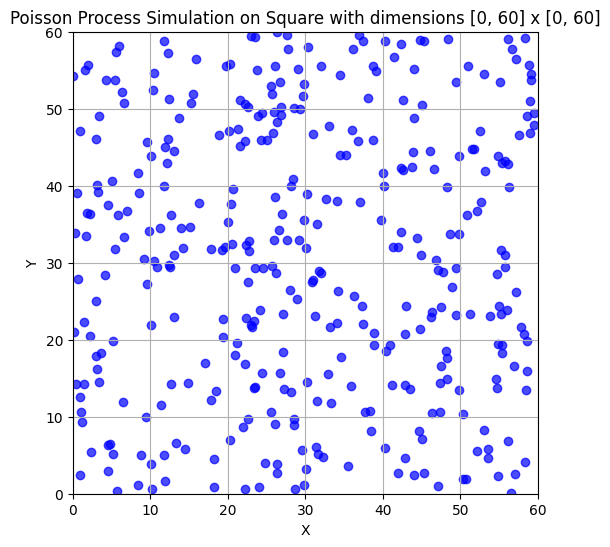

'COORDINATES OF THE POINTS: [[2.15347620e+00 3.63191742e+01]\n [2.84268587e+01 4.09167684e+01]\n [5.71237131e+01 2.61504999e+01]\n [4.60352493e+01 4.45397234e+01]\n [2.35114141e+01 2.93589028e+01]\n [2.95783970e+01 5.67762029e+00]\n [5.35464758e+01 4.61840799e+00]\n [2.98245298e+01 1.17503608e+00]\n [2.15092909e+01 5.10770838e+01]\n [5.17627955e+01 4.48231113e+01]\n [4.50636524e+01 5.04681778e+01]\n [4.13491205e+01 3.21060180e+01]\n [2.55113928e+01 1.06369500e+01]\n [4.97846246e+01 4.38433152e+01]\n [2.63265756e+01 2.71758471e+00]\n [2.44189474e+01 1.56180371e+01]\n [8.66210890e-01 1.26250982e+01]\n [2.51061323e+01 4.59979595e+01]\n [3.74313686e+01 5.87390921e+01]\n [5.51847224e+01 5.34481623e+01]\n [1.74553688e+00 3.35313121e+01]\n [3.59080632e+01 1.40539919e+01]\n [2.09827699e+01 1.80193695e+01]\n [4.04416585e+01 1.85658808e+01]\n [4.62176064e+01 2.28870164e+01]\n [5.07333408e+00 4.06689431e+01]\n [1.28079788e-01 2.09652065e+01]\n [4.24104684e+01 3.39589966e+01]\n [3.27163664e+01 3.8

In [8]:
#EXAMPLE

T = 60 # Size of the square domain
lam = 0.1  # Density parameter

# Simulate Poisson process
simulate_and_plot_poisson_process_on_plane(T, lam)




In [6]:
#PROBABILITY MASS FUNCTION OF A POISSON PROCESS ON A PLANE: prob of having k points in a space D with poisson process of density lambda

def poisson_process_on_a_plane_probability_mass_function(lam, k, D_area):

    # Calculate e^(-lambda * area)
    exp_term = np.exp(-lam * D_area)

    # Calculate (lambda * area)^k / k!
    poisson_term = (lam * D_area)**k / math.factorial(k)

    # Calculate the PMF value
    pmf_value = exp_term * poisson_term

    return f"The probability of having {k} points in a plane of area {D_area} given a Poissson process on a plane with density lambda equal to {lam} is: {pmf_value}"



In [7]:
# Example probability mass function of a poisson process on a plane:

lambda_val = 0.1 # Lambda parameter
k_val = 2        # Number of points/events
area_val = 100   # Area of the domain

poisson_process_on_a_plane_probability_mass_function(lambda_val, k_val, area_val)

'The probability of having 2 points in a plane of area 100 given a Poissson process on a plane with density lambda equal to 0.1 is: 0.0022699964881242427'

In [8]:
#EXPECTATION OF A POISSON PROCESS ON A PLANE

def poisson_process_on_a_plane_expectation(lam, D_area):
  return f'The expected number of points for a poisson process on a plane of Area {D_area} is: {lam* D_area}'



In [9]:
#Example expectation of a poisson process on a plane:

lambda_val = 0.3 # Lambda parameter
area_val = 200   # Area of the domain

poisson_process_on_a_plane_expectation(lambda_val, area_val)

'The expected number of points for a poisson process on a plane of Area 200 is: 60.0'

BOOLEAN RANDOM NETWORK

In [10]:
def simulate_poisson_process_on_plane(T, lam):
        # Step 1: Generate number of points N ~ Poi(lam * T^2)
        N = np.random.poisson(lam * T**2)

        # Step 2: Generate uniform random points in (0, T)x(0, T)
        if N == 0:
            return np.array([])  # No points in Λ
        else:
            points = np.random.rand(N, 2) * T  # Generate N random points with 2 coordinates each
            return points

def find_clusters(points, r):
    """
    Find clusters in a Boolean random network based on Euclidean distance.

    Parameters:
    points : numpy.ndarray
        Array of shape (N, 2) containing N points where each point is (x, y) coordinates.
    r : float
        Radius for connecting points.

    Returns:
    num_clusters : int
        Number of clusters found.
    """
    def bfs(node, visited):
        queue = deque([node])
        cluster = []
        while queue:
            v = queue.popleft()
            if tuple(v) not in visited:
                visited.add(tuple(v))
                cluster.append(v)
                neighbors = [w for w in points if np.linalg.norm(v - w) <= 2 * r and tuple(w) not in visited]
                queue.extend(neighbors)
        return cluster

    visited = set()
    num_clusters = 0

    for point in points:
        if tuple(point) not in visited:
            cluster = bfs(point, visited)
            num_clusters += 1

    return num_clusters

def simulate_boolean_network_avg_number_of_clusters(T, lam, M):
    """
    Simulate Boolean random network multiple times and compute the average number of clusters.

    Parameters:
    T : float
        Size of the square domain.
    lam : float
        Density parameter of the Poisson process.
    M : int
        Number of simulations to perform.

    Returns:
    avg_num_clusters : float
        Average number of clusters found in the simulations.
    """
    r = 1
    num_clusters_list = []

    for _ in range(M):
        # Simulate Poisson process
        points = simulate_poisson_process_on_plane(T, lam)

        # Find clusters
        num_clusters = find_clusters(points, r)
        num_clusters_list.append(num_clusters)

    # Compute average number of clusters
    avg_num_clusters = np.mean(num_clusters_list)

    return avg_num_clusters




In [11]:
# Parameters
T = 100  # Size of the square domain
lam = 0.1  # Density parameter for Poisson process
M = 50  # Number of simulations

# Perform simulation
avg_num_clusters = simulate_boolean_network_avg_number_of_clusters(T, lam, M)

print(f"Average number of clusters: {avg_num_clusters}")

Average number of clusters: 511.82


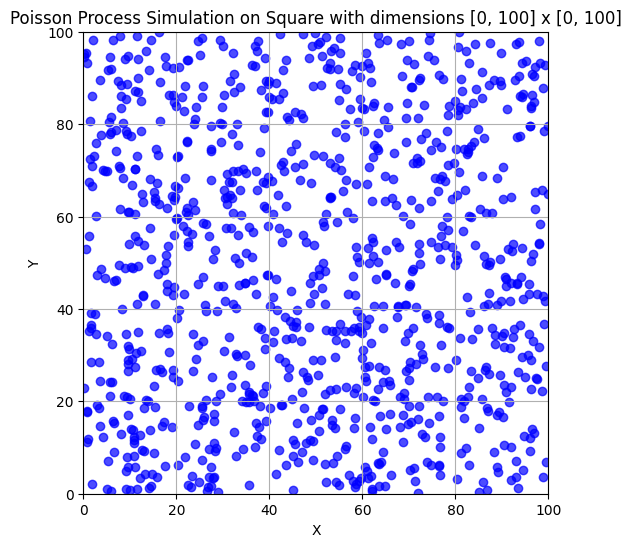

'COORDINATES OF THE POINTS: [[37.03406922 69.84778385]\n [56.31494767 35.2064331 ]\n [17.8451119  49.98196732]\n ...\n [16.91792253 26.41694872]\n [30.11130001 45.02893011]\n [ 8.37866228 40.08259825]]'

In [12]:
#graphical representation:

simulate_and_plot_poisson_process_on_plane(100, 0.1)
                                          

Running simulation to discover how the size of the largest cluster depends on lambda:

* set T -size of the square domain- 100
* set M -number of simulations- 100
* let lambda varying


In [13]:
def find_clusters(points, r):
    """
    Find clusters in a Boolean random network based on Euclidean distance.

    Parameters:
    points : numpy.ndarray
        Array of shape (N, 2) containing N points where each point is (x, y) coordinates.
    r : float
        Radius for connecting points.

    Returns:
    clusters : list
        List of clusters, where each cluster is a list of points.
    """
    def bfs(node, visited):
        queue = deque([node])
        cluster = []
        while queue:
            v = queue.popleft()
            if tuple(v) not in visited:
                visited.add(tuple(v))
                cluster.append(v)
                neighbors = [w for w in points if np.linalg.norm(v - w) <= 2 * r and tuple(w) not in visited]
                queue.extend(neighbors)
        return cluster

    visited = set()
    clusters = []

    for point in points:
        if tuple(point) not in visited:
            cluster = bfs(point, visited)
            clusters.append(cluster)

    return clusters

def largest_cluster_size(clusters):
    """
    Find the size of the largest cluster.

    Parameters:
    clusters : list
        List of clusters, where each cluster is a list of points.

    Returns:
    largest_size : int
        Size of the largest cluster.
    """
    if not clusters:
        return 0
    largest_size = max(len(cluster) for cluster in clusters)
    return largest_size

def simulate_boolean_network(T, lam, M):
    """
    Simulate Boolean random network multiple times and compute the average size of the largest cluster
    and the average number of points.

    Parameters:
    T : float
        Size of the square domain.
    lam : float
        Density parameter of the Poisson process.
    M : int
        Number of simulations to perform.

    Returns:
    avg_largest_cluster_size : float
        Average size of the largest cluster found in the simulations.
    avg_num_points : float
        Average number of points generated in the simulations.
    """
    r = 1
    largest_cluster_sizes = []
    total_num_points = []

    for _ in range(M):
        # Simulate Poisson process
        points = simulate_poisson_process_on_plane(T, lam)

        # Record number of points
        total_num_points.append(len(points))

        # Find clusters
        clusters = find_clusters(points, r)
        size_of_largest_cluster = largest_cluster_size(clusters)
        largest_cluster_sizes.append(size_of_largest_cluster)

    # Compute average size of the largest cluster and average number of points
    avg_largest_cluster_size = np.mean(largest_cluster_sizes)
    avg_num_points = np.mean(total_num_points)

    return avg_largest_cluster_size, avg_num_points



In [14]:
# Parameters

T = 100  # Size of the square domain
lam = 0.12  # Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: {(avg_largest_cluster_size/avg_num_points)*100} %")

The average number of points is: 1200.775
Average size of the largest cluster: 17.65
PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: 1.4698840332285397 %


In [15]:
#THRESHOLD SIMULATION

# Parameters
T = 100  # Size of the square domain
lam = (4.513/(4*math.pi)) # THRESHOLD VALUE Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: {(avg_largest_cluster_size/avg_num_points)*100} %")


The average number of points is: 3603.0
Average size of the largest cluster: 2068.9
PERCENTAGE OF POINTS IN THE BIGGEST CLUSTER: 57.42159311684707 %


In [16]:
#crea una tabella che registra su asse X il valore di lambda e su Y la percentale di punti appartenenti al largest cluster

T = 100  # Size of the square domain
lambda_values = np.arange(0.1, 0.42, 0.02)  # Density parameter for Poisson process
M = 20  # Number of simulations

# Perform simulations
results = []

for lam in lambda_values:
    avg_largest_cluster_size, avg_num_points = simulate_boolean_network(T, lam, M)
    if avg_num_points > 0:
        percentage_in_largest_cluster = (avg_largest_cluster_size / avg_num_points) * 100
    else:
        percentage_in_largest_cluster = 0
    results.append(percentage_in_largest_cluster)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, results, marker='o', linestyle='-', color='b')
plt.title('Percentage of Points in the Largest Cluster vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Percentage of Points in the Largest Cluster')
plt.grid(True)
plt.show()

